In [1]:
# ============================================================
# Laboratorio 2 - IA
#
# Daniel Chet - 231177 
# Dulce Ambrosio - 231143 
# Gadiel Ocaña - 231270
#
# ============================================================


In [2]:
# ============================================================
#
# TASK 2 – PREPARACIÓN DE DATOS
#
# ============================================================

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/web-page-phishing-detection-dataset/dataset_phishing.csv


In [4]:
# Se utiliza para poder ver algunos datos y confirmar que se cargo el dataset de manera correcta
df = pd.read_csv("/kaggle/input/web-page-phishing-detection-dataset/dataset_phishing.csv")
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [5]:
# Se usa para verl las filas y columnas del dataset
df.shape

(11430, 89)

In [6]:
# Se usa para ver variables 
# categóricas, númericas y columnas sospechosas como IDs

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [7]:
# Se usa para encontrar columnas sospechosas (para ver que columna dice que si es phisshing o no)

df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [8]:
# Se usa para confirmar la columna objetivo/etiqueta correcta
df['status'].value_counts()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

In [9]:
# Se elimina la columna url, porque:
#        - El contenido es puro texto y necesitamoos datos numéricos
#        - No se puede generalizar por lo que no se puede transformar a datos numéricos 
#        - El modelo lo puede usar como un ID lo que puede provocar que el modelo memorice y no aprenda
df = df.drop(columns=['url'], errors='ignore')

In [10]:
# Se verifica que ya no esta el url en las columnas
df.columns

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyp

In [11]:
# Se convierten los valores de texto a números (0 y 1), es la etiqueta del modelo
# No se obtiene ninguna salida ya que map() no imprime, la acción se hace de manera directa en el DataFrame
# Si los valores originales no coinciden se generan NaN
df['status'] = df['status'].map({
    'legitimate': 0,
    'phishing': 1
})


In [12]:
# Cuenta los valores de status
df['status'].value_counts()

# Verificamos la distribución de clases en 'status'

status
0    5715
1    5715
Name: count, dtype: int64

In [13]:
# Muestra el tipo de dato de la columna status
# Al mostrar un int indica que la transformación de datos fue correcta 
# Entonces ahora al tener los datos de manera numérica ya podemos trabajar con ellos
df['status'].dtype

dtype('int64')

In [14]:
# Muestra información de los datos
# Confirmamos que los datos están limpios y listos para modelado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 88 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  11430 non-null  int64  
 1   length_hostname             11430 non-null  int64  
 2   ip                          11430 non-null  int64  
 3   nb_dots                     11430 non-null  int64  
 4   nb_hyphens                  11430 non-null  int64  
 5   nb_at                       11430 non-null  int64  
 6   nb_qm                       11430 non-null  int64  
 7   nb_and                      11430 non-null  int64  
 8   nb_or                       11430 non-null  int64  
 9   nb_eq                       11430 non-null  int64  
 10  nb_underscore               11430 non-null  int64  
 11  nb_tilde                    11430 non-null  int64  
 12  nb_percent                  11430 non-null  int64  
 13  nb_slash                    114

In [15]:
# Separamos las variables de entrada (features) y la etiqueta (target)
# x = las columnas que el modelo va a usar para aprender
# y = la etiqueta que queremos predecir (status)

X = df.drop(columns=['status'])
y = df['status']

# Al usar "x" como la entrada y "y" como la salida esperada
# El modelo no puede hacer como trampa para usar la respuesta como entrada

# NO MUESTRA NADA 

In [16]:
# Muestra el tamño de los datos, las filas deben de coincidir 
# ya que anteriormente vimos que tenian la misma cantidad (0 y 1)
X.shape, y.shape

((11430, 87), (11430,))

In [17]:
# --- Empieza el split ---
# Se importa la función del split para dividir los datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

In [18]:
# Se dividen los datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [19]:
# Se verifica el tamaño de los conjuntos
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9144, 87), (2286, 87), (9144,), (2286,))

In [20]:
# --- Se hace el escalado (Must) ---
# Se realizo despues del split ya que si se realizaba antes afecta, ya que el modelo veria los datos de prueba 

# Se importa el escalado (StandardScaler) para normalizar las variables y evitar problemas de convergencia en los modelos
from sklearn.preprocessing import StandardScaler

In [21]:
# Se crea el objeto encargado de calcular la media y desviación estándar de los datos de entrenamiento
scaler = StandardScaler()

# NO MUESTRA NADA 

In [22]:
# Se ajusta el escalador únicamente con los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Se transforman los datos de prueba usando el mismo escalador
X_test_scaled = scaler.transform(X_test)

# NO MUESTRA NADA 

In [23]:
# Se verifica que las variables escaladas tengan media cercana a 0 y desviación estándar cercana a 1

X_train_scaled.mean(axis=0)[:5], X_train_scaled.std(axis=0)[:5]

(array([ 6.29417778e-17,  1.69010329e-17,  4.42923621e-17, -7.45976625e-17,
         5.43941289e-18]),
 array([1., 1., 1., 1., 1.]))

In [24]:
# Se seleccionan los 2 features más correlacionados con status

correlations = df.corr()['status'].drop('status')
correlations.abs().sort_values(ascending=False).head(5)

# Se toman las dos features con mayor correlación, por lo que en este caso es google_index y page_rank

google_index        0.731171
page_rank           0.511137
nb_www              0.443468
ratio_digits_url    0.356395
domain_in_title     0.342807
Name: status, dtype: float64

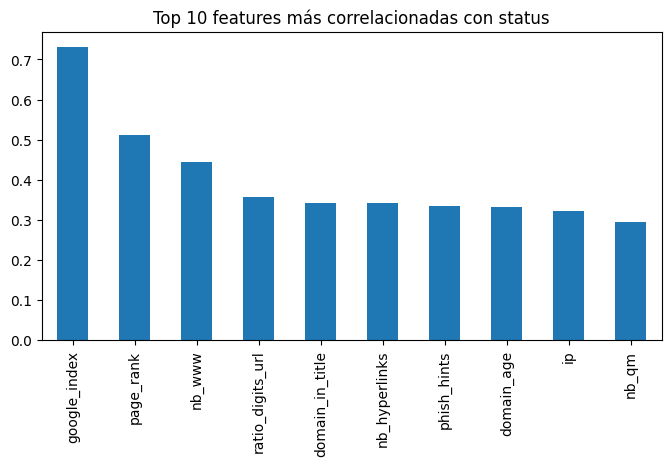

In [25]:
# Gráficas para el análisis
import matplotlib.pyplot as plt

correlations.abs().sort_values(ascending=False).head(10).plot(
    kind='bar',
    figsize=(8,4),
    title='Top 10 features más correlacionadas con status'
)
plt.show()


In [26]:
# Selección de las dos features más correlacionadas
features_2D = ['google_index', 'page_rank']

X_train_2D = X_train[features_2D].values
X_test_2D  = X_test[features_2D].values

In [27]:
# Conjunto de entrenamiento cono solo 2 features
X_train_2D.shape

(9144, 2)

In [28]:
# ============================================================
#
# TASK 3 – IMPLEMENTACIÓN DESDE CERO
#
# ============================================================

In [29]:
# Se realiza una exploración visual del espacio de 
# características antes del entrenamiento del modelo

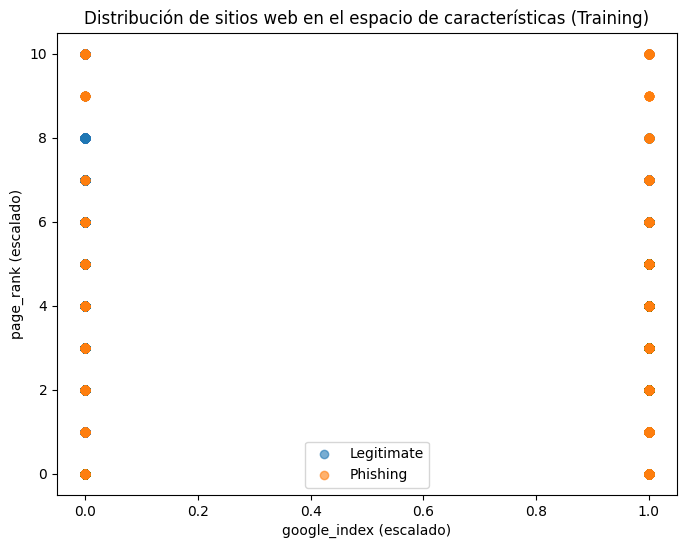

In [30]:
# Se separan las muestras (0 y 1), se grafica cada sitio como un punto
# Eje X → google_index      Eje Y → page_rank
# Se visualiza el conjunto de entrenamiento en un espacio 2D,
# donde cada punto representa un sitio web y el color indica
# si es legítimo o phishing

import matplotlib.pyplot as plt

# Separar las clases
legit = y_train == 0
phish = y_train == 1

plt.figure(figsize=(8, 6))

plt.scatter(
    X_train_2D[legit, 0],
    X_train_2D[legit, 1],
    label='Legitimate',
    alpha=0.6
)

plt.scatter(
    X_train_2D[phish, 0],
    X_train_2D[phish, 1],
    label='Phishing',
    alpha=0.6
)

plt.xlabel('google_index (escalado)')
plt.ylabel('page_rank (escalado)')
plt.title('Distribución de sitios web en el espacio de características (Training)')
plt.legend()
plt.show()


In [31]:
# ---- Regresión Logística con Descenso del Gradiente ---- 

# Se hace uso de la función sigmoide para convertir los valores 
# en probabilidades entre 0 y 1
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# NO MUESTRA NADA 

In [32]:
# Se implementa la predicción 𝑦̂ = 𝑔(𝑋 ⋅ 𝑤 + 𝑏) (Hipótesis)
# Hipótesis de la regresión logística calcula la probabilidad de phishing

def predict_proba(X, w, b):
    z = np.dot(X, w) + b
    return sigmoid(z)

# NO MUESTRA NADA 

In [33]:
# Función de costo la cual mide qué tan mal está clasificando el modelo
def log_loss(y, y_hat):
    epsilon = 1e-15  # evita log(0)
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

# NO MUESTRA NADA 

In [34]:
# Entrenamiento del modelo mediante descenso del gradiente
def train_logistic_regression(X, y, lr=0.1, epochs=1000):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    loss_history = []

    for _ in range(epochs):
        y_hat = predict_proba(X, w, b)
        
        dw = (1/m) * np.dot(X.T, (y_hat - y))
        db = (1/m) * np.sum(y_hat - y)
        
        w -= lr * dw
        b -= lr * db
        
        loss = log_loss(y, y_hat)
        loss_history.append(loss)

    return w, b, loss_history

# NO MUESTRA NADA 

In [35]:
# Entrenar el modelo (2D)
w, b, loss_history = train_logistic_regression(
    X_train_2D, y_train, lr=0.1, epochs=1000
)

# NO MUESTRA NADA 

In [36]:
# Predicción de probabilidades usando la función definida
y_pred_prob = predict_proba(X_test_2D, w, b)

In [37]:
# Threshold de decisión (clasificación binaria)
y_pred_manual = (y_pred_prob >= 0.5).astype(int)


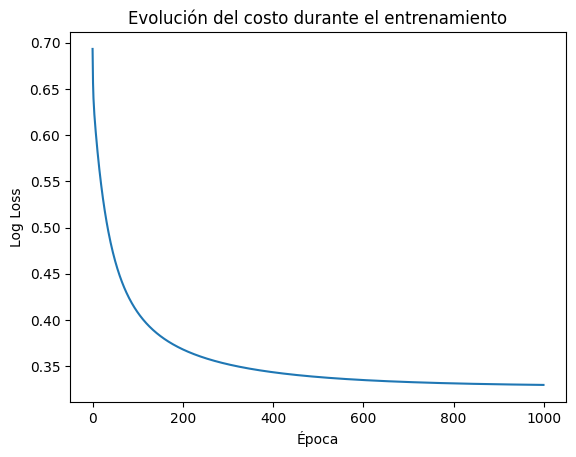

In [38]:
# GRAFICA DE COSTO

import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Época')
plt.ylabel('Log Loss')
plt.title('Evolución del costo durante el entrenamiento')
plt.show()


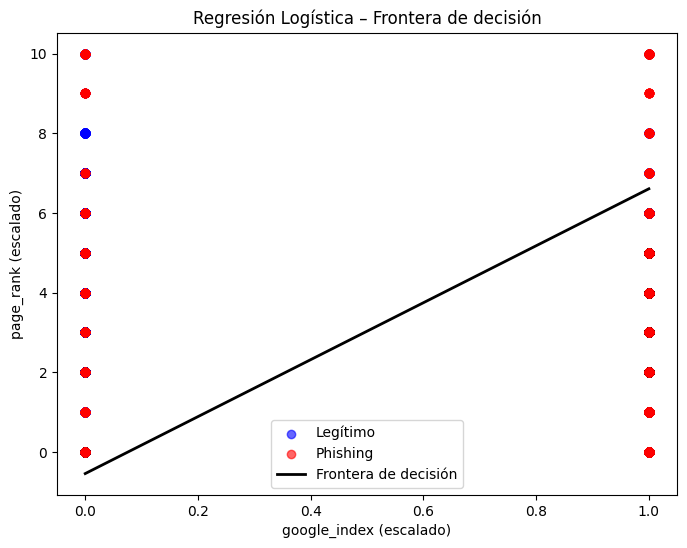

In [39]:
# Threshold de Decisión 
# La línea representa el conjunto de puntos donde el modelo es indiferente
# entre clasificar un sitio como phishing o legítimo.

# Crear un rango de valores para el eje X
x_values = np.linspace(
    X_train_2D[:, 0].min(),
    X_train_2D[:, 0].max(),
    100
)

# Ecuación de la frontera de decisión
y_values = -(w[0] * x_values + b) / w[1]

plt.figure(figsize=(8, 6))

# Scatter de los datos
plt.scatter(
    X_train_2D[y_train == 0, 0],
    X_train_2D[y_train == 0, 1],
    color='blue',
    alpha=0.6,
    label='Legítimo'
)

plt.scatter(
    X_train_2D[y_train == 1, 0],
    X_train_2D[y_train == 1, 1],
    color='red',
    alpha=0.6,
    label='Phishing'
)

# Línea de decisión
plt.plot(
    x_values,
    y_values,
    color='black',
    linewidth=2,
    label='Frontera de decisión'
)

plt.xlabel('google_index (escalado)')
plt.ylabel('page_rank (escalado)')
plt.title('Regresión Logística – Frontera de decisión')
plt.legend()
plt.show()


In [40]:
# ---- K-Nearest Neighbours manual ----
# Implementación manual de KNN usando distancia euclidiana y votación mayoritaria
def predict_knn(X_train, y_train, X_test, k):
    predictions = []

    for x_test in X_test:
        # Distancia euclidiana
        distances = np.sqrt(np.sum((X_train - x_test) ** 2, axis=1))
        
        # Índices de los k vecinos
        k_indices = np.argsort(distances)[:k]
        
        # Etiquetas de los vecinos 
        k_labels = y_train.values[k_indices]
        
        # Votación mayoritaria
        prediction = np.bincount(k_labels).argmax()
        predictions.append(prediction)

    return np.array(predictions)


# NO MUESTRA NADA 

In [41]:
# Clasificacion de pruebas con k = 3
y_pred_knn = predict_knn(X_train_2D, y_train, X_test_2D, k=3)

# NO MUESTRA NADA 

In [42]:
# Mapa de color de fondo (decision boundary)

# Rango del plano
x_min, x_max = X_train_2D[:, 0].min() - 0.5, X_train_2D[:, 0].max() + 0.5
y_min, y_max = X_train_2D[:, 1].min() - 0.5, X_train_2D[:, 1].max() + 0.5

# NO MUESTRA NADA 

In [43]:
# Se crea la malla de puntos en 2D
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# NO MUESTRA NADA 

In [44]:
# Se clasifica cada punto del grid con KNN
# Convertimos el grid en una lista de puntos
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predicción KNN (k=3)
Z = predict_knn(X_train_2D, y_train, grid_points, k=3)

# Volvemos a la forma de la malla
Z = Z.reshape(xx.shape)

# NO MUESTRA NADA 

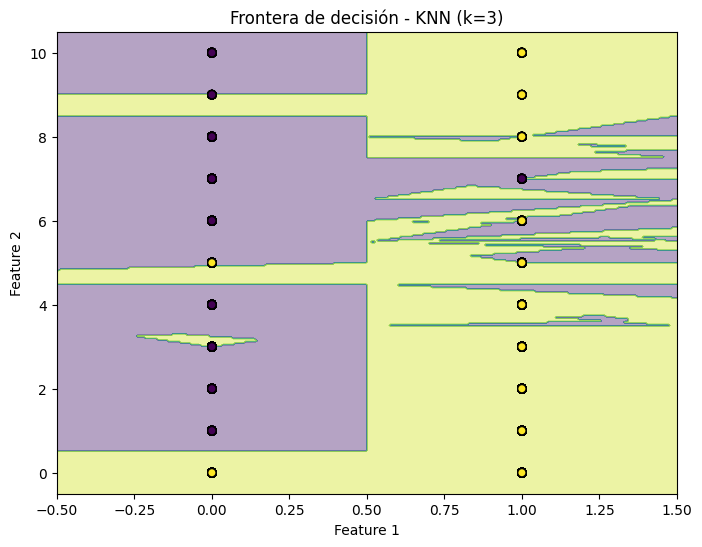

In [45]:
# Se grafica la frontera de decision

plt.figure(figsize=(8, 6))

# Mapa de color de fondo
plt.contourf(xx, yy, Z, alpha=0.4)

# Puntos reales
plt.scatter(
    X_train_2D[:, 0],
    X_train_2D[:, 1],
    c=y_train,
    edgecolor='k'
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Frontera de decisión - KNN (k=3)")
plt.show()


In [46]:
# ============================================================
#
# TASK 4 – COMPARACIÓN
#
# ============================================================

In [47]:
# Se importan las librerias que se van a usar

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# NO MUESTRA NADA 

In [48]:
# Se escala solo para sklearn sin tocar la implementacion manual
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# NO MUESTRA NADA 

In [49]:
# Se entrena modelos de sklearn

log_reg_sk = LogisticRegression(max_iter=2000)
log_reg_sk.fit(X_train_scaled, y_train)

y_pred_log_sk = log_reg_sk.predict(X_test_scaled)

# NO MUESTRA NADA 

In [50]:
# KNN (sklearn, K=3)
# KNN usa las 2 variables

knn_sk = KNeighborsClassifier(n_neighbors=3)
knn_sk.fit(X_train_2D, y_train)

y_pred_knn_sk = knn_sk.predict(X_test_2D)

# NO MUESTRA NADA 

In [51]:
# Metricas para sklearn
# LogisticRegression usa todos los features

# Logistic Regression sklearn
acc_log_sk = accuracy_score(y_test, y_pred_log_sk)
prec_log_sk = precision_score(y_test, y_pred_log_sk)
rec_log_sk = recall_score(y_test, y_pred_log_sk)

# KNN sklearn
acc_knn_sk = accuracy_score(y_test, y_pred_knn_sk)
prec_knn_sk = precision_score(y_test, y_pred_knn_sk)
rec_knn_sk = recall_score(y_test, y_pred_knn_sk)

# NO MUESTRA NADA

In [52]:
# Metricas de los modelos manuales

# Regresión logística manual
acc_log_manual = accuracy_score(y_test, y_pred_manual)
prec_log_manual = precision_score(y_test, y_pred_manual)
rec_log_manual = recall_score(y_test, y_pred_manual)

# KNN manual
acc_knn_manual = accuracy_score(y_test, y_pred_knn)
prec_knn_manual = precision_score(y_test, y_pred_knn)
rec_knn_manual = recall_score(y_test, y_pred_knn)

# NO MUESTRA NADA 

In [53]:
# SE MUESTRAN LOS RESULTADOS
print("=== REGRESIÓN LOGÍSTICA ===")
print("Manual -> Accuracy:", acc_log_manual,
      "Precision:", prec_log_manual,
      "Recall:", rec_log_manual)

print("Sklearn -> Accuracy:", acc_log_sk,
      "Precision:", prec_log_sk,
      "Recall:", rec_log_sk)

print("\n=== KNN (k=3) ===")
print("Manual -> Accuracy:", acc_knn_manual,
      "Precision:", prec_knn_manual,
      "Recall:", rec_knn_manual)

print("Sklearn -> Accuracy:", acc_knn_sk,
      "Precision:", prec_knn_sk,
      "Recall:", rec_knn_sk)


=== REGRESIÓN LOGÍSTICA ===
Manual -> Accuracy: 0.8521434820647419 Precision: 0.8425531914893617 Recall: 0.8661417322834646
Sklearn -> Accuracy: 0.9361329833770778 Precision: 0.9392070484581497 Recall: 0.9326334208223972

=== KNN (k=3) ===
Manual -> Accuracy: 0.8709536307961505 Precision: 0.851575456053068 Recall: 0.8985126859142607
Sklearn -> Accuracy: 0.8337707786526685 Precision: 0.8736532810969637 Recall: 0.7804024496937882
